In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [64]:
X, h = np.linspace(0, 4, 10, retstep=True)
Y = np.sin(X**2)

In [65]:
matrix_2 = np.eye(X.shape[0]-1) + np.eye(X.shape[0]-1, k=-1)
b_2 = np.append(0, 1/h**2*(Y[2:]-2*Y[1:-1]+Y[:-2]))
c_2 = np.linalg.solve(matrix_2, b_2)

In [66]:
matrix_3 = 4 * np.eye(X.shape[0]) + np.eye(X.shape[0], k=-1) + np.eye(X.shape[0], k=1)
matrix_3[0] = 0
matrix_3[0, 0] = 1
matrix_3[-1] = 0
matrix_3[-1, -1] = 1

b_3 = np.append(0, 6/h**2*(Y[2:]-2*Y[1:-1]+Y[:-2]))
b_3 = np.append(b_3, 0)
c_3 = np.linalg.solve(matrix_3, b_3)

In [67]:
result_x = []
result_y_2 = []
result_y_3 = []

for i in range(X.shape[0]-1):
    x = np.linspace(X[i], X[i+1], 1000)
    S_2 = Y[i] + ((Y[i+1]-Y[i])/(X[i+1]-X[i]))*(x-X[i]) + c_2[i]*(x-X[i])*(x-X[i+1])
    
    S_3 = c_3[i]/(6*h)*(X[i+1]-x)**3+c_3[i+1]/(6*h)*(x-X[i])**3 + \
        (Y[i]/h-h*c_3[i]/6)*(X[i+1]-x)+(Y[i+1]/h-h*c_3[i+1]/6)*(x-X[i])
  
    result_x.append(x)
    result_y_2.append(S_2)
    result_y_3.append(S_3)
    
result_y_2 = np.concatenate(result_y_2)
result_y_3 = np.concatenate(result_y_3)
result_x = np.concatenate(result_x)

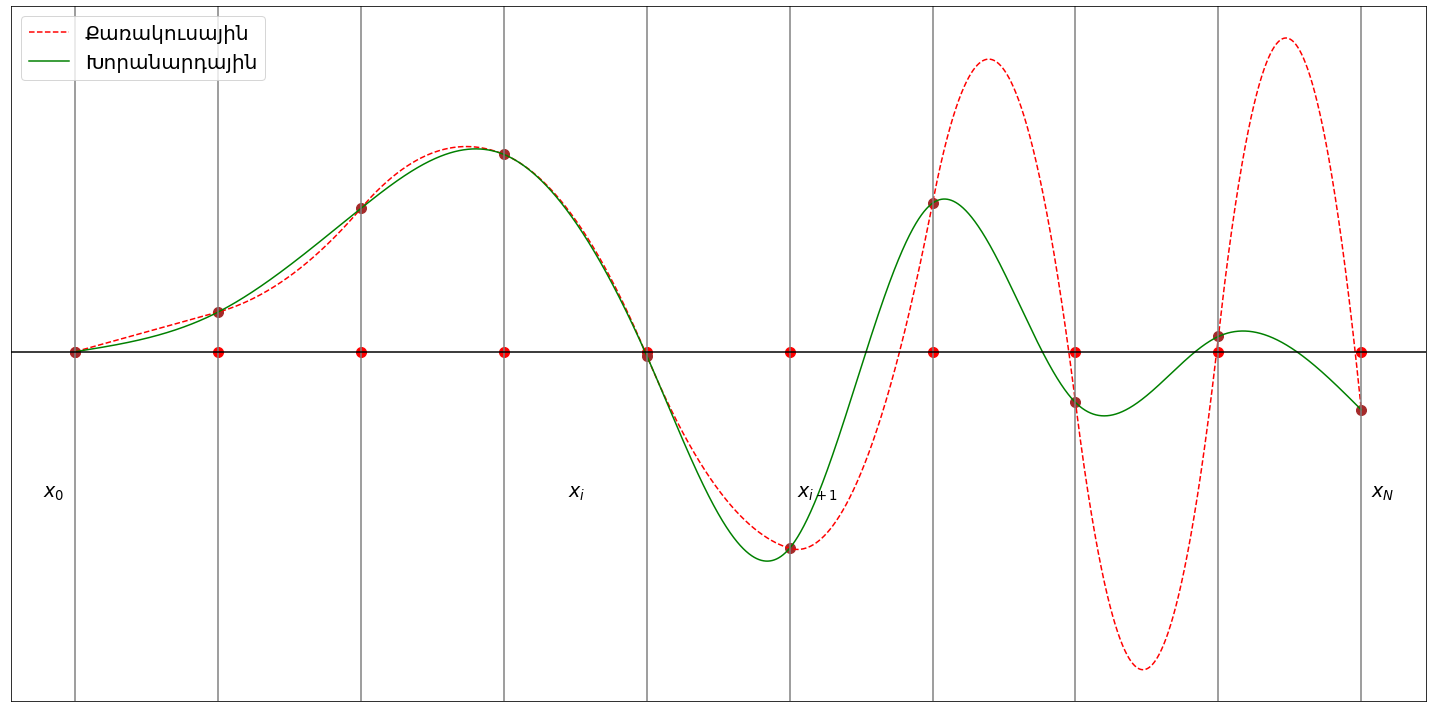

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(result_x, result_y_2, color="red", ls="--")
ax.plot(result_x, result_y_3, color="green", ls="-")

ax.scatter(X, X*0, color="red", s=100)
ax.scatter(X, Y, color="brown", s=100)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for j, _ in enumerate(X):
    ax.axvline(x=X[j], color="gray")

ax.axhline(y=0, color="black")

ax.text(0.03, 0.3, '$x_{0}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)

ax.text(0.57, 0.3, '$x_{i+1}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)

ax.text(0.4, 0.3, '$x_{i}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)

ax.text(0.97, 0.3, '$x_{N}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)

ax.legend(["Քառակուսային", "Խորանարդային"], fontsize=20)
fig.tight_layout()
plt.show()

In [99]:
#fig.savefig("../images/quadratic_and_cubic_interploation")